<a href="https://colab.research.google.com/github/sprihaanvi/Insights/blob/main/tea_leaf_disease_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_dir='drive/My Drive/images'




In [3]:

import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd

import numpy as np

import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
#set image size batch size for pre processing
img_height,img_width=180,180
batch_size=32



In [5]:

# divide dataset for trainig
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

In [6]:
# #divide dataset for validation
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

In [7]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
# # Set up data augmentation
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     validation_split=0.2)

# # Load in the dataset
# train_data = datagen.flow_from_directory(
#     data_dir,
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical',
#     subset='training')

# val_data = datagen.flow_from_directory(
#     data_dir,
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical',
#     subset='validation')

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'  # Use categorical labels
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'  # Use categorical labels
)

Found 1500 files belonging to 9 classes.
Using 1200 files for training.
Found 1500 files belonging to 9 classes.
Using 300 files for validation.


In [9]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.6)

test_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size= 32,
    shuffle=True,
    class_mode='categorical',
    subset='validation')

Found 900 images belonging to 9 classes.


Found 1500 files belonging to 9 classes.
Using 1200 files for training.
Found 1500 files belonging to 9 classes.
Using 300 files for validation.


In [ ]:
# augmented_images = []
# augmented_labels = []

# for images, labels in train_ds:
#     for image in images:
#         augmented_image = datagen.random_transform(image.numpy())
#         augmented_images.append(augmented_image)
#     augmented_labels.extend(labels.numpy())

# # Create a new dataset with augmented data
# train_ds_combined = tf.data.Dataset.from_tensor_slices((augmented_images, augmented_labels))


In [10]:
# # Get the class names from the dataset
# class_names = train_data.class_indices.keys()
# print(class_names)

class_names = train_ds.class_names
print(class_names)


['algal_spot', 'anthracnose', 'bird_eyespot', 'brown_blight', 'gray_blight', 'healthy', 'helopeltis', 'red_spot', 'white_spot']


In [11]:
#our dataset have 9 classes
num_classes = 9

In [18]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Use 'softmax' for categorical labels
])




In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [20]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical cross-entropy
              metrics=['accuracy'])

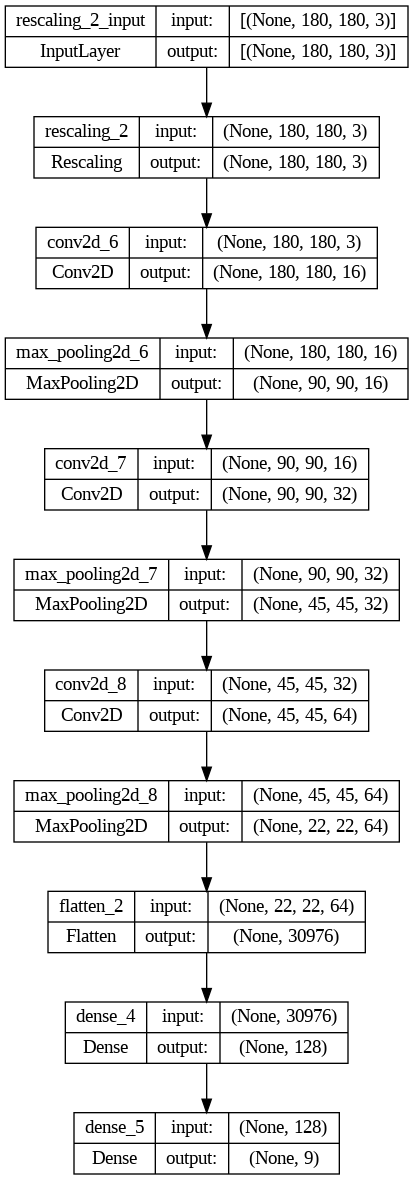

In [21]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [22]:
#fit the model
epochs=30

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/30
38/38 [==============================] - 277s 6s/step - loss: 2.2081 - accuracy: 0.2117 - val_loss: 1.6685 - val_accuracy: 0.3533
Epoch 2/30
38/38 [==============================] - 18s 419ms/step - loss: 1.2007 - accuracy: 0.5267 - val_loss: 0.9516 - val_accuracy: 0.6367
Epoch 3/30
38/38 [==============================] - 18s 413ms/step - loss: 0.7616 - accuracy: 0.6892 - val_loss: 0.7716 - val_accuracy: 0.6900
Epoch 4/30
38/38 [==============================] - 18s 410ms/step - loss: 0.6604 - accuracy: 0.7317 - val_loss: 0.7818 - val_accuracy: 0.6967
Epoch 5/30
38/38 [==============================] - 19s 444ms/step - loss: 0.5185 - accuracy: 0.7917 - val_loss: 0.9517 - val_accuracy: 0.6433
Epoch 6/30
38/38 [==============================] - 18s 418ms/step - loss: 0.5365 - accuracy: 0.7917 - val_loss: 0.7481 - val_accuracy: 0.7267
Epoch 7/30
38/38 [==============================] - 18s 419ms/step - loss: 0.3601 - accuracy: 0.8675 - val_loss: 0.6626 - val_accuracy: 0.7533
E

In [23]:
#finally save the model
tf.keras.models.save_model(model,'tea.hdf5')

<ipython-input-23-9291ecdaca63>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,'tea.hdf5')


In [26]:

from matplotlib import pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

filepath = './tea.hdf5'
model = load_model(filepath)
print(model)

print("Model Loaded Successfully")

Model Loaded Successfully


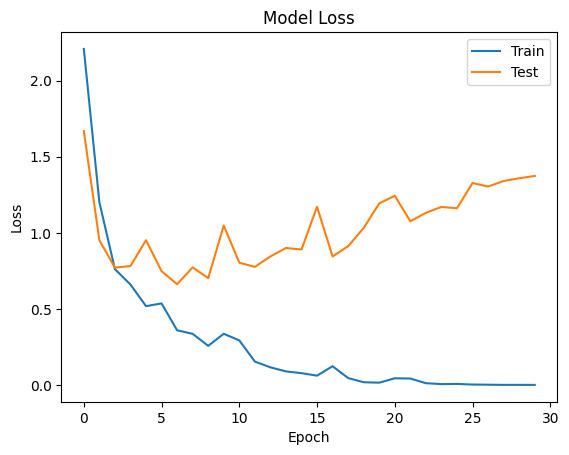

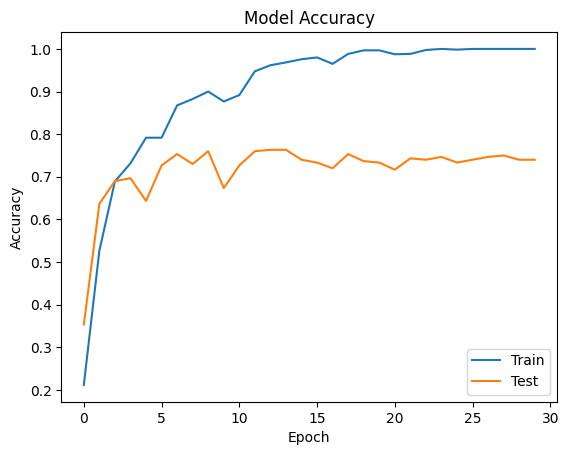

In [27]:
def plot_loss(history):
    # Plot training and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

def plot_accuracy(history):
    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='lower right')
    plt.show()
plot_loss(history)
plot_accuracy(history)


In [28]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix




In [29]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the model
model = load_model('tea.hdf5')

# Get the class names
class_names = train_ds.class_names

# Initialize variables to store class-wise counts
class_counts = {class_name: 0 for class_name in class_names}
class_correct_counts = {class_name: 0 for class_name in class_names}

# Iterate over the validation dataset to calculate class-level accuracy
for images, labels in val_ds:
    predictions = model.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)
    true_classes = tf.argmax(labels, axis=1)

    for i in range(len(class_names)):
        class_name = class_names[i]
        class_counts[class_name] += tf.reduce_sum(tf.cast(true_classes == i, tf.int32))
        class_correct_counts[class_name] += tf.reduce_sum(tf.cast(tf.logical_and(true_classes == i, true_classes == predicted_classes), tf.int32))

# Calculate and print class-level accuracy
print('Class-level accuracy:')
for class_name in class_names:
    accuracy = class_correct_counts[class_name] / class_counts[class_name]
    print(f'{class_name}: {accuracy.numpy():.4f}')


1/1 [==============================] - 0s 76ms/step
Class-level accuracy:
algal_spot: 0.8056
anthracnose: 0.6000
bird_eyespot: 0.7895
brown_blight: 0.6786
gray_blight: 0.5000
healthy: 0.7179
helopeltis: 0.7692
red_spot: 0.8718
white_spot: 1.0000


1/1 [==============================] - 0s 20ms/step


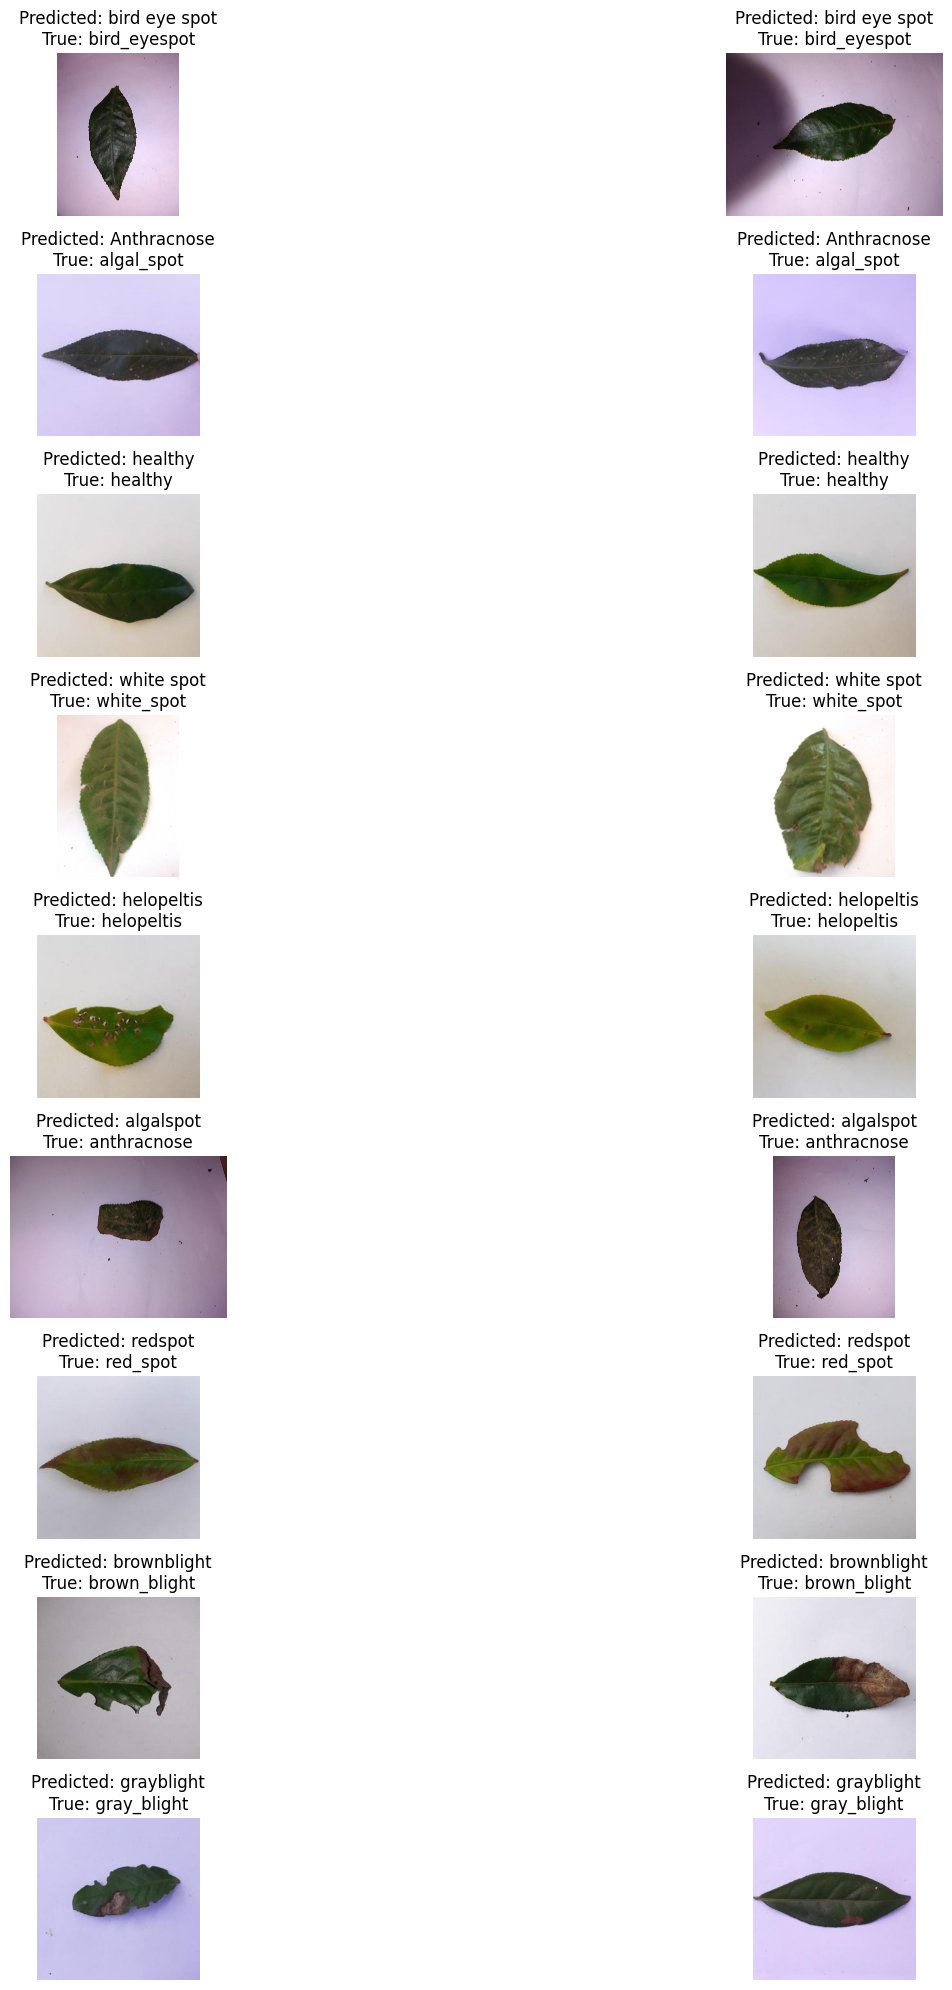

In [30]:
import os
import random


def predict(test_img_path, true_class_name):
    test_image = load_img(test_img_path, target_size=(180, 180))
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    result = model.predict(test_image)
    pred = np.argmax(result, axis=1)[0]
    expression = ['Anthracnose', 'algalspot', 'bird eye spot', 'brownblight', 'grayblight', 'healthy', 'helopeltis', 'redspot', 'white spot']

    test_image = plt.imread(test_img_path)
    return test_image, expression[pred], true_class_name


class_directories = os.listdir(data_dir)

num_images_to_select = 2
fig, axes = plt.subplots(len(class_directories), num_images_to_select, figsize=(20, 20))

for i, class_dir in enumerate(class_directories):
    class_path = os.path.join(data_dir, class_dir)
    if os.path.isdir(class_path):
        image_files = os.listdir(class_path)
        random_images = random.sample(image_files, num_images_to_select)
        for j, image_file in enumerate(random_images):
            image_path = os.path.join(class_path, image_file)
            test_image, predicted_class, true_class = predict(image_path, class_dir)

            axes[i, j].imshow(test_image)
            axes[i, j].axis('off')
            axes[i, j].set_title(f"Predicted: {predicted_class}\nTrue: {true_class}")

plt.tight_layout()
plt.show()



In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [32]:
history_df = pd.DataFrame(history.history)
history_df.to_csv("history.csv")
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
25,0.003566,1.0,1.327424,0.740000
26,0.002577,1.0,1.304006,0.746667
27,0.001403,1.0,1.340607,0.750000
28,0.001489,1.0,1.358320,0.740000
29,0.001124,1.0,1.373855,0.740000
